In [1]:
#perform imports and load dataset
import numpy as np
import pandas as pd
import spacy
import re # For regular expressions
import string # For handling string
import nltk
import pickle
import sklearn
import matplotlib.pyplot as plt
from nltk.util import ngrams
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
import gensim
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/lise-
[nltk_data]     mariehugo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lise-
[nltk_data]     mariehugo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#pip install \
   #pandas matplotlib numpy \
   #nltk seaborn sklearn gensim pyldavis \
   #wordcloud textblob spacy textstat

#TERMINAL 

In [5]:
df = pd.read_excel(r'/Users/lise-mariehugo/Desktop/Thesisdata/FinDataLabelled/2012/X2012_1.xlsx')


In [6]:
df.head()

,id,source,created_at,lang,text,label,possibly_sensitive,edit_history_tweet_ids,author_id,conversation_id,...,urls,annotations,mentions,retweet_count,reply_count,like_count,quote_count,place_id,coordinates.type,coordinates.coordinates
0,1.532864e+17,Twitter for BlackBerry¬Æ,2012-01-01T01:28:19.000Z,en,@dorothyblack eish... And since then it got a ...,NaN,False,1.532864e+17,83786624.0,1.532850e+17,...,NaN,NaN,"list(start = 0, end = 13, username = ""DorothyB...",0,0.0,0.0,0.0,NaN,NaN,NaN
1,1.532881e+17,Twitter for BlackBerry¬Æ,2012-01-01T01:35:15.000Z,tl,@ZlatanDzinic dude long street looks like fuck...,-1.0,False,1.532881e+17,83786624.0,1.532872e+17,...,NaN,NaN,"list(start = 0, end = 13, username = ""ZlatanDz...",0,0.0,0.0,0.0,NaN,NaN,NaN
2,1.533571e+17,TweetCaster for Android,2012-01-01T06:09:24.000Z,en,Touch down baby #jozi thanks kulula,NaN,False,1.533571e+17,6225362.0,1.533571e+17,...,NaN,NaN,NaN,0,0.0,0.0,0.0,d98aef293ae7311d,Point,"c(28.2355678, -26.1234539)"
3,1.533609e+17,Twitter for iPhone,2012-01-01T06:24:22.000Z,en,"Waiting at the airport, off to #Johannesburg s...",NaN,False,1.533609e+17,170696303.0,1.533609e+17,...,NaN,NaN,NaN,0,1.0,0.0,0.0,8b9ec16fdc0d7e55,Point,"c(18.59716255, -33.96924694)"
4,1.533788e+17,Twitter for iPhone,2012-01-01T07:35:34.000Z,en,Time to fly!! #Johannesburg here I come! Going...,NaN,False,1.533788e+17,170696303.0,1.533788e+17,...,NaN,NaN,NaN,0,0.0,0.0,0.0,8b9ec16fdc0d7e55,Point,"c(18.59945206, -33.97402462)"


In [7]:
#insert a indices column
lists = list(range(len(df)))

#create new column 
df["index"] = lists
type(df)

pandas.core.frame.DataFrame

In [8]:
df.isnull().sum() #also look for empty strings
df.shape

(1740, 24)

In [9]:
#df["hashtag"].head()

,id,source,created_at,lang,text,label,possibly_sensitive,edit_history_tweet_ids,author_id,conversation_id,...,annotations,mentions,retweet_count,reply_count,like_count,quote_count,place_id,coordinates.type,coordinates.coordinates,index
1,1.532881e+17,Twitter for BlackBerry¬Æ,2012-01-01T01:35:15.000Z,tl,@ZlatanDzinic dude long street looks like fuck...,-1.0,False,1.532881e+17,83786624.0,1.532872e+17,...,NaN,"list(start = 0, end = 13, username = ""ZlatanDz...",0,0.0,0.0,0.0,NaN,NaN,NaN,1
5,1.534078e+17,Trendsmap Alerting,2012-01-01T09:30:50.000Z,en,"Arthur Goldstuck, @art2gee is now trending in ...",0.0,False,1.534078e+17,172650029.0,1.534078e+17,...,"list(start = 0, end = 15, probability = 0.9932...","list(start = 18, end = 26, username = ""art2gee...",0,0.0,0.0,0.0,e564d30dc173d2a8,NaN,NaN,5
6,1.534104e+17,Trendsmap Alerting,2012-01-01T09:40:59.000Z,en,"Arthur Goldstuck, @art2gee is now trending in ...",0.0,False,1.534104e+17,132338160.0,1.534104e+17,...,"list(start = 0, end = 15, probability = 0.9932...","list(start = 18, end = 26, username = ""art2gee...",0,0.0,0.0,0.0,8b9ec16fdc0d7e55,NaN,NaN,6
7,1.534179e+17,Trendsmap Alerting,2012-01-01T10:10:44.000Z,en,'knowles' is now trending in #Johannesburg htt...,0.0,False,1.534179e+17,172650029.0,1.534179e+17,...,NaN,NaN,1,0.0,0.0,0.0,e564d30dc173d2a8,NaN,NaN,7
11,1.534554e+17,Trendsmap Alerting,2012-01-01T12:40:00.000Z,en,#hillbrow is now trending in #Johannesburg htt...,0.0,False,1.534554e+17,172650029.0,1.534554e+17,...,NaN,NaN,0,0.0,0.0,0.0,e564d30dc173d2a8,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,1.636668e+17,Twitter for BlackBerry¬Æ,2012-01-29T16:56:31.000Z,en,#capetown #southafrica Perfect day exploring t...,0.5,False,1.636668e+17,110505138.0,1.636668e+17,...,NaN,NaN,0,1.0,0.0,0.0,ab42d0293a346841,Point,"c(18.39182, -34.12131)",1617
1638,1.638666e+17,Twitter Web Client,2012-01-30T06:10:28.000Z,en,At Durban City Hall for a meeting of the full ...,1.0,False,1.638666e+17,114995071.0,1.638666e+17,...,"list(start = 3, end = 18, probability = 0.9144...",NaN,0,0.0,0.0,0.0,9d7cae88ff6a29f5,NaN,NaN,1638
1680,1.640454e+17,Twitter for BlackBerry¬Æ,2012-01-30T18:00:39.000Z,en,"Impressive sunset \Table Cloth\"" over the Hott...",1.0,False,1.640454e+17,110505138.0,1.640454e+17,...,NaN,NaN,0,0.0,0.0,0.0,00d8d13a6f5fcedf,Point,"c(18.83744, -34.10812)",1680
1699,1.642226e+17,Twitter Web Client,2012-01-31T05:45:01.000Z,en,If the government still owes us R599 Million m...,-0.5,False,1.642226e+17,114995071.0,1.642226e+17,...,NaN,NaN,0,0.0,0.0,0.0,08cf288c7b54f834,NaN,NaN,1699


# Cleaning the data

In [13]:
q = ['en','nl','und']
#drop duplicates
df = df.drop_duplicates(keep='first')
df.shape
#drop non south african languages
#df.drop(df[ (df['lang'] != 'en') & (df['lang'] != 'nl') & (df['lang'] != 'und') ].index, inplace = True)
df1 = df
#df1.drop(df1[ (df1['lang'] != 'en') ].index, inplace = True)

df.shape

(1740, 24)

In [14]:
#removing numbers
df1['text'] = df1['text'].astype('string')
df1.dropna(subset=['text'], inplace=True)

In [15]:
#make hashtag column
def extract_hashtags(text):
     
    # the regular expression
    regex = "#(\w+)"
     
    # extracting the hashtags
    hashtag_list = re.findall(regex, text)
     
    # printing the hashtag_list
    return(hashtag_list)
        

#def find_hash(data):
    #hword=re.findall(r'(?<=#)\w+',data)
    #return " ".join(hword)

df1["hashtag"]=df1["text"].apply(lambda x: extract_hashtags(x))

In [16]:
print(df1['hashtag'])

0                              [NYE]
1                    [sadtweet, NYE]
2                             [jozi]
3                 [Johannesburg, CT]
4                     [Johannesburg]
                    ...             
1735           [3rddegree, CapeTown]
1736                      [CapeTown]
1737                      [CapeTown]
1738                      [CapeTown]
1739    [tittytuesday, Johannesburg]
Name: hashtag, Length: 1740, dtype: object


In [17]:
#lowercase
df1['text']=df1['text'].apply(lambda x: x.lower())

#print(textDF.head())
#itworked!

#removing mentions
df1['text']=df1['text'].apply(lambda x: re.sub("@[A-Za-z0-9_]+",'', x))

#removing numbers and words containing numbers
df1['text']=df1['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#removing hashtags?
#df1['text']=df1['text'].apply(lambda x: re.sub("#[A-Za-z0-9_]+",'', x))
#df1['text']=df1['text'].apply(lambda x: re.split('#|_', x))
df1['text']=df1['text'].apply(lambda x: " ".join(word.strip() for word in re.split('#|_', x)))


#removing links
df1['text']=df1['text'].apply(lambda x: re.sub(r"http\S+",'', x))
df1['text']=df1['text'].apply(lambda x: re.sub(r"www.\S+",'', x))


#removing punctuation
df1['text']=df1['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#removing empty spaces and special characters
df1['text']=df1['text'].apply(lambda x: re.sub('[^A-Za-z0-9]+',' ',x))

df1.shape
df1.head()

,id,source,created_at,lang,text,label,possibly_sensitive,edit_history_tweet_ids,author_id,conversation_id,...,mentions,retweet_count,reply_count,like_count,quote_count,place_id,coordinates.type,coordinates.coordinates,index,hashtag
0,1.532864e+17,Twitter for BlackBerry¬Æ,2012-01-01T01:28:19.000Z,en,eish and since then it got a lot worse p nye,NaN,False,1.532864e+17,83786624.0,1.532850e+17,...,"list(start = 0, end = 13, username = ""DorothyB...",0,0.0,0.0,0.0,NaN,NaN,NaN,0,[NYE]
1,1.532881e+17,Twitter for BlackBerry¬Æ,2012-01-01T01:35:15.000Z,tl,dude long street looks like fucking lagos sadt...,-1.0,False,1.532881e+17,83786624.0,1.532872e+17,...,"list(start = 0, end = 13, username = ""ZlatanDz...",0,0.0,0.0,0.0,NaN,NaN,NaN,1,"[sadtweet, NYE]"
2,1.533571e+17,TweetCaster for Android,2012-01-01T06:09:24.000Z,en,touch down baby jozi thanks kulula,NaN,False,1.533571e+17,6225362.0,1.533571e+17,...,NaN,0,0.0,0.0,0.0,d98aef293ae7311d,Point,"c(28.2355678, -26.1234539)",2,[jozi]
3,1.533609e+17,Twitter for iPhone,2012-01-01T06:24:22.000Z,en,waiting at the airport off to johannesburg soo...,NaN,False,1.533609e+17,170696303.0,1.533609e+17,...,NaN,0,1.0,0.0,0.0,8b9ec16fdc0d7e55,Point,"c(18.59716255, -33.96924694)",3,"[Johannesburg, CT]"
4,1.533788e+17,Twitter for iPhone,2012-01-01T07:35:34.000Z,en,time to fly johannesburg here i come going to ...,NaN,False,1.533788e+17,170696303.0,1.533788e+17,...,NaN,0,0.0,0.0,0.0,8b9ec16fdc0d7e55,Point,"c(18.59945206, -33.97402462)",4,[Johannesburg]


# Removing stopwords

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'be', 'since', 'an', 'please', 'nor', 'along', 'always', 'well', 'twenty', 'may', 'so', 'the', 'our', 'other', 'nevertheless', 'beforehand', 'already', 'full', "'s", 'within', 'keep', 'elsewhere', 'beside', 'forty', 'alone', 'front', 'are', 'n’t', 'or', 'at', 'towards', 'was', 'yourselves', 'therein', 'beyond', 'thereafter', 'while', 'several', 'which', '‘ll', 'last', 'quite', 'else', 'never', 'whenever', 'side', 'indeed', 'them', 'seems', 'third', 'why', 'much', 'each', '’ll', 'out', 'throughout', 'mostly', 'now', 'it', 'whereby', 'others', 'amount', 'nine', 'former', 'also', 'wherever', 'twelve', 'further', 'doing', 'and', 'thereby', 'everyone', 'will', 'per', 'over', 'whole', 'after', 'thereupon', 'various', 'regarding', 'these', 'ten', "'d", 'same', 'can', 'been', 'noone', 'whatever', 'although', 'every', 'how', 'becomes', 'your', 'anyone', 'around', 'those', 'see', 'without', 'sometimes', 'yourself', 'hereafter', 'almost', 'herein', '‘ve', 'five', 'meanwhile', 'something', 'herse

In [19]:
#to see if something is a stopword
print(nlp.vocab['myself'].is_stop)


True


In [20]:
#add twitter as a stop word and rt
# Add the word to the set of stop words. Use LOWERCASE!
nlp.Defaults.stop_words.add('twitter')
nlp.Defaults.stop_words.add('rt')
nlp.Defaults.stop_words.add('s')
nlp.Defaults.stop_words.add('tweet')
nlp.Defaults.stop_words.add('trend')
nlp.Defaults.stop_words.add('follower')
nlp.Defaults.stop_words.add('null')
nlp.Defaults.stop_words.add('http')
nlp.Defaults.stop_words.add('url')

# Set the stop_word tag on the lexeme
nlp.vocab['twitter'].is_stop = True
nlp.vocab['rt'].is_stop = True
nlp.vocab['s'].is_stop = True
nlp.vocab['tweet'].is_stop = True
nlp.vocab['trend'].is_stop = True
nlp.vocab['follower'].is_stop = True
nlp.vocab['null'].is_stop = True
nlp.vocab['http'].is_stop = True
nlp.vocab['url'].is_stop = True

stop = nlp.Defaults.stop_words

# Lemmatisation & Stopword removal 

In [21]:
# Loading model
nlp = spacy.load('en_core_web_sm')

# Lemmatization with stopwords removal
df1["text"]=df1["text"].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if ((token.is_stop==False)&((token.pos_=="ADJ")|(token.pos_=="NOUN")|(token.pos_=="VERB")))]))
#df1.head()

#df1["text"]=df1["text"].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if ((token.is_stop==False))]))

In [22]:
df1.shape

(1740, 25)

In [23]:
#getting rid of empty text rows
df1.dropna(subset = "text", inplace=True)
df1.shape

(1740, 25)

# Sentiment libraries

In [24]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

In [25]:
#pip install vaderSentiment

#add a new column 
lists = list(range(len(df)))
df["Sentiment"] = lists

#aply function to get sentiment for each row
#df1['Sentiment'] = df1['text'].apply(lambda x: sid_obj.polarity_scores(x)['compound'])
result = []

df1["text"] = pd.DataFrame(df1["text"] )
type(df1["text"] )

for index, row in df1.iterrows():
     text = row['text']
     sentiment  = sid_obj.polarity_scores(text)['compound']
     result.append((sentiment))

df1['Sentiment'] = result

In [26]:
#df1.to_excel(r'/Users/lise-mariehugo/Desktop/2016DecHash.xlsx')

## Feature extraction

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

df1.shape

#min_df=2
vectorizer = CountVectorizer(min_df=10)
X = vectorizer.fit_transform(df1["text"])

Y = X.toarray()
    

#feat_dict=vectorizer.vocabulary_.keys()
nummat = pd.DataFrame(data=Y, columns=vectorizer.get_feature_names_out())

counter = nummat.sum()

#print(nummat.head())

counter.to_excel(r'/Users/lise-mariehugo/Desktop/Mat.xlsx')



nummat.shape

(1740, 42)

In [28]:
#TD-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
#print(corpus2)
X_train_tfidf = tfidf_transformer.fit_transform(X)
Y = X_train_tfidf.toarray()
#checking type
#test.dtypes()
nummat2 = pd.DataFrame(data=Y, columns=vectorizer.get_feature_names_out())

nummat2.shape


(1740, 42)

In [29]:
#chi-square
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

#X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
#X_new.shape


In [30]:
#n-gram feature
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(3, 3))
counts = ngram_vectorizer.fit_transform(df1["text"])
Y = counts.toarray()
nummat3 = pd.DataFrame(data=Y, columns=ngram_vectorizer.get_feature_names_out())
nummat3.head()

,aa,ab,ac,ad,af,ag,ai,aj,al,am,...,ze,zeb,zen,zer,zi,zin,zon,zul,zy,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#sid_obj = SentimentIntensityAnalyzer()
#result = sid_obj.polarity_scores(df1['text'][1])['compound']
#print(result)

#range(df1['sentiment'])
df1['text'].head()

0                          get lot bad p
1                  long street look fuck
2                       touch baby thank
3    wait airport beautiful morning miss
4          time fly come go miss soonest
Name: text, dtype: object

In [32]:
counter = nummat3.sum()

#print(nummat.head())

counter.to_excel(r'/Users/lise-mariehugo/Desktop/Mat.xlsx')


# Creating final data frame

In [33]:

df1 = df1.reset_index(drop=True)
finaldf = pd.concat([df1, nummat2], axis=1)


In [34]:
display(finaldf)

,id,source,created_at,lang,text,label,possibly_sensitive,edit_history_tweet_ids,author_id,conversation_id,...,time,today,town,travel,trend,visit,way,wo,world,year
0,1.532864e+17,Twitter for BlackBerry¬Æ,2012-01-01T01:28:19.000Z,en,get lot bad p,NaN,False,1.532864e+17,83786624.0,1.532850e+17,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1.532881e+17,Twitter for BlackBerry¬Æ,2012-01-01T01:35:15.000Z,tl,long street look fuck,-1.0,False,1.532881e+17,83786624.0,1.532872e+17,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,1.533571e+17,TweetCaster for Android,2012-01-01T06:09:24.000Z,en,touch baby thank,NaN,False,1.533571e+17,6225362.0,1.533571e+17,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,1.533609e+17,Twitter for iPhone,2012-01-01T06:24:22.000Z,en,wait airport beautiful morning miss,NaN,False,1.533609e+17,170696303.0,1.533609e+17,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,1.533788e+17,Twitter for iPhone,2012-01-01T07:35:34.000Z,en,time fly come go miss soonest,NaN,False,1.533788e+17,170696303.0,1.533788e+17,...,0.588193,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,1.644562e+17,Trendsmap Alerting,2012-01-31T21:13:14.000Z,en,trend capetown,NaN,False,1.644562e+17,132338160.0,1.644562e+17,...,0.000000,0.0,0.0,0.0,0.576363,0.0,0.0,0.0,0.0,0.0
1736,1.644626e+17,Trendsmap Alerting,2012-01-31T21:38:27.000Z,en,trend capetown,NaN,False,1.644626e+17,132338160.0,1.644626e+17,...,0.000000,0.0,0.0,0.0,0.576363,0.0,0.0,0.0,0.0,0.0
1737,1.644626e+17,Trendsmap Alerting,2012-01-31T21:38:30.000Z,en,trend capetown,NaN,False,1.644626e+17,132338160.0,1.644626e+17,...,0.000000,0.0,0.0,0.0,0.576363,0.0,0.0,0.0,0.0,0.0
1738,1.644770e+17,Trendsmap Alerting,2012-01-31T22:35:48.000Z,en,swansea trend capetown,NaN,False,1.644770e+17,132338160.0,1.644770e+17,...,0.000000,0.0,0.0,0.0,0.576363,0.0,0.0,0.0,0.0,0.0


In [35]:
#finaldf.to_excel(r'/Users/lise-mariehugo/Desktop/F2011Feb.xlsx')

# Clustering

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15).fit(X_train_tfidf)

In [37]:
# store cluster labels in a variable
clusters = kmeans.labels_

In [38]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

    
clusterdata = get_top_keywords(8)


Cluster 0
have,hope,hot,know,life,get,year,trend

Cluster 1
hope,hot,know,life,go,year,capetown,trend

Cluster 2
great,visit,travel,be,today,go,love,capetown

Cluster 3
cape,great,durban,know,today,go,capetown,day

Cluster 4
hot,durban,stop,city,day,good,capetown,morning

Cluster 5
town,city,capetown,beautiful,take,day,be,life

Cluster 6
have,good,capetown,hope,trend,get,be,matricresult

Cluster 7
town,travel,cape,beautiful,day,love,capetown,way

Cluster 8
summer,year,time,hope,day,get,capetown,good

Cluster 9
have,hope,hot,know,life,get,year,wo

Cluster 10
life,durban,get,go,good,love,capetown,night

Cluster 11
morning,world,be,good,today,go,capetown,come

Cluster 12
life,good,durban,be,year,visit,capetown,thank

Cluster 13
hope,hot,know,life,go,year,place,capetown

Cluster 14
summer,town,capetown,cape,sunset,city,wo,durban


In [39]:
#clusterdata.head()

In [40]:
def cluster_text(text):

    vectorizer = CountVectorizer(min_df=2)
    X = vectorizer.fit_transform(text)
    
    tfidf_transformer = TfidfTransformer()
    #print(corpus2)
    X = tfidf_transformer.fit_transform(X)
    
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
       km = KMeans(n_clusters=k, max_iter=200, n_init=10)
       km = km.fit(X)
       Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.savefig('elbow.png')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels=model.labels_
    clusters=pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    #print(clusters.sort_values(by=['cluster']))

    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
        
    return

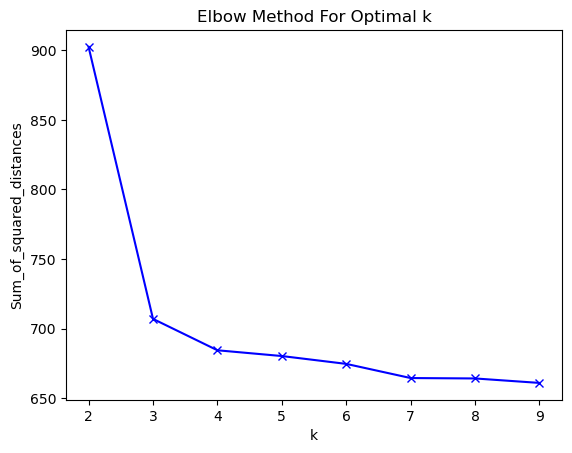

How many clusters do you want to use?
7
                 title  cluster
5                trend        0
7                trend        0
9                trend        0
11      hillbrow trend        0
15               trend        0
...                ...      ...
1730     runfree trend        0
1731    firework trend        0
1733             trend        0
1734  fabulosity trend        0
1739             trend        0

[580 rows x 2 columns]
                                                  title  cluster
0                                         get lot bad p        1
1                                 long street look fuck        1
2                                      touch baby thank        1
3                   wait airport beautiful morning miss        1
4                         time fly come go miss soonest        1
...                                                 ...      ...
1716  opinion capetown raise destination marketing u...        1
1725                            

In [41]:
cluster_text(df1["text"])

In [42]:
#use a different clustering method 
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.8, min_samples=10).fit(X_train_tfidf)
clusters = db.labels_

In [43]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(15)


Cluster -1
stop,come,city,know,good,great,year,visit,world,time,cape,go,day,durban,capetown

Cluster 0
city,durban,go,thank,life,get,today,matricresult,love,be,night,morning,good,day,capetown

Cluster 1
come,day,love,durban,go,good,great,have,hope,hot,know,life,get,year,trend

Cluster 2
day,love,get,durban,good,great,have,hope,hot,know,life,go,year,trend,capetown

Cluster 3
come,day,durban,world,get,good,great,have,hope,hot,know,life,look,go,year

Cluster 4
go,year,great,have,hope,know,life,good,today,city,morning,love,hot,capetown,way

Cluster 5
come,day,love,durban,go,good,great,have,hope,hot,know,life,get,year,wo

Cluster 6
day,love,get,year,good,great,have,hope,hot,know,life,go,capetown,wo,durban

Cluster 7
get,durban,good,great,have,hope,hot,go,city,town,know,awesome,capetown,restaurant,travel


In [44]:
df1.hist(column='Sentiment', bins=9)
plt.savefig('classimb.png')

In [45]:
#spectral clustering
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=8).fit(X_train_tfidf)


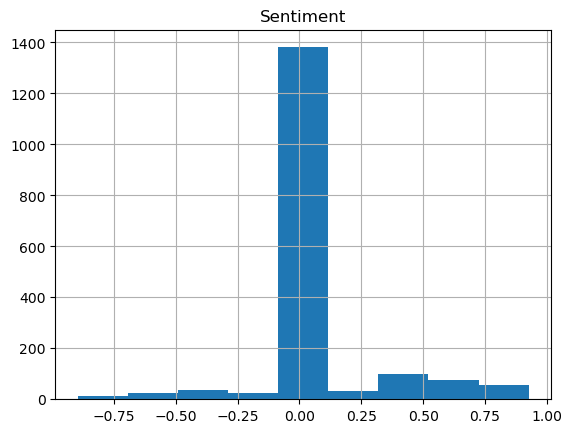

In [46]:
#there is definitely a class imbalance
plt.show()

In [47]:
#text length
df['text'].str.len().hist(bins=50)

<AxesSubplot:>

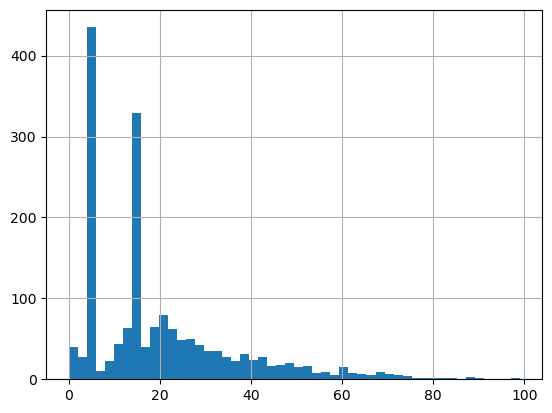

In [48]:
plt.show()

In [49]:
#number of words in each text
df['text'].str.split().map(lambda x: len(x)).hist(bins=17)

plt.savefig('tweetlength.png')

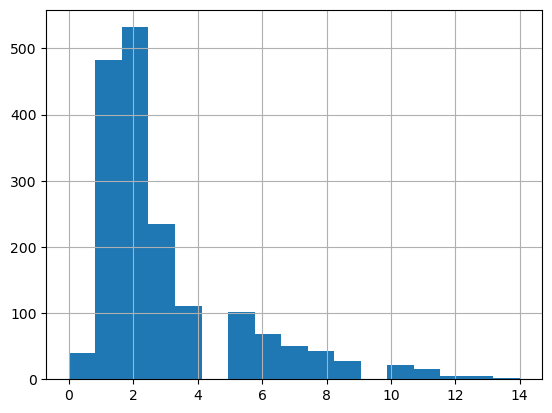

In [50]:
plt.show()

In [51]:
#look at source column

In [52]:
df1['source'].head()

0    Twitter for BlackBerry¬Æ
1    Twitter for BlackBerry¬Æ
2     TweetCaster for Android
3          Twitter for iPhone
4          Twitter for iPhone
Name: source, dtype: object

In [53]:
df1['source'].value_counts()

Trendsmap Alerting           1114
Twitter for BlackBerry¬Æ      209
Twitter for iPhone            127
Twitter Web Client            103
UberSocial for BlackBerry      43
Instagram                      31
www.kartenquiz.de              26
TweetDeck                      14
Echofon                        10
Twitter for Android            10
Twitter for iPad                7
Foursquare                      7
Hootsuite                       6
Camera on iOS                   4
Twittelator                     4
Photos on iOS                   4
Tweetbot for iOS                4
Twitter for Windows Phone       4
TweetCaster for Android         2
TweetCaster for iOS             2
Flickr                          2
Gravity!                        1
SafeTweet by TweetMyJOBS        1
dlvr.it                         1
Safari on iOS                   1
UberSocial for Android          1
Name: source, dtype: int64

In [54]:
df['lang'].value_counts()

en     1586
tl       29
de       29
in       25
es       21
et       14
nl       12
qme       8
und       4
da        2
pt        2
ro        2
ca        2
ht        2
it        2
Name: lang, dtype: int64

In [55]:
from wordcloud import WordCloud


data = df1["text"]

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

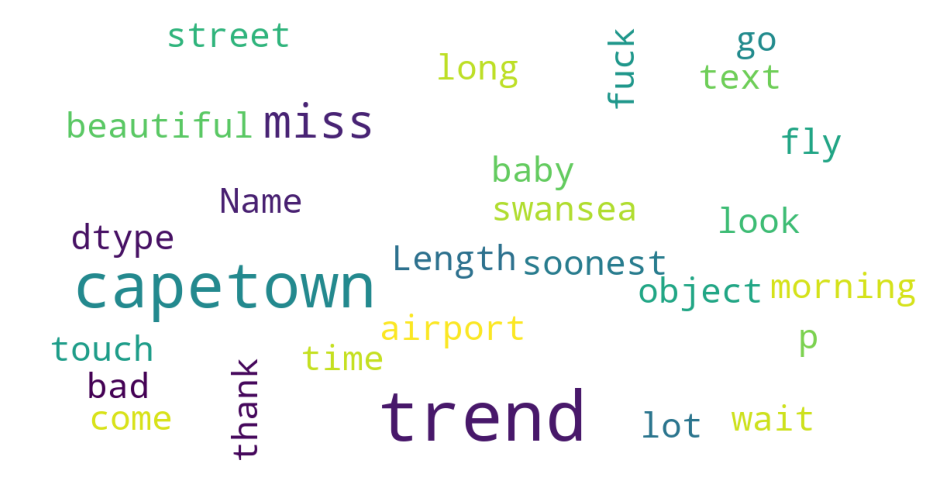

In [56]:
show_wordcloud(data)

In [57]:
#recognising entities

def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df1['text'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

In [58]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

<AxesSubplot:>

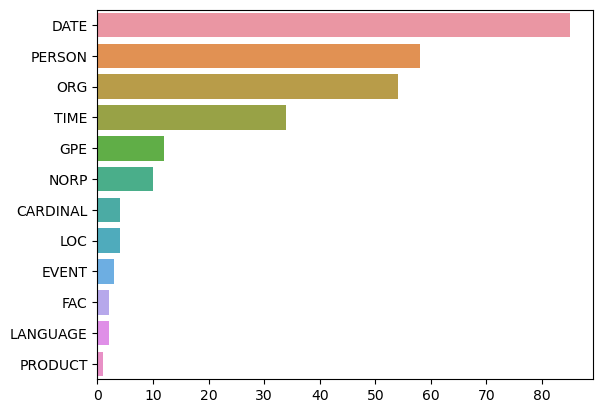

In [59]:
plt.show()

/Users/lise-mariehugo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


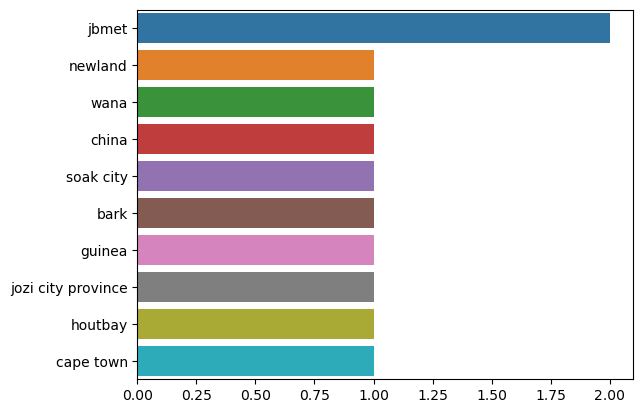

In [60]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=df1["text"].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

plt.show()

/Users/lise-mariehugo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


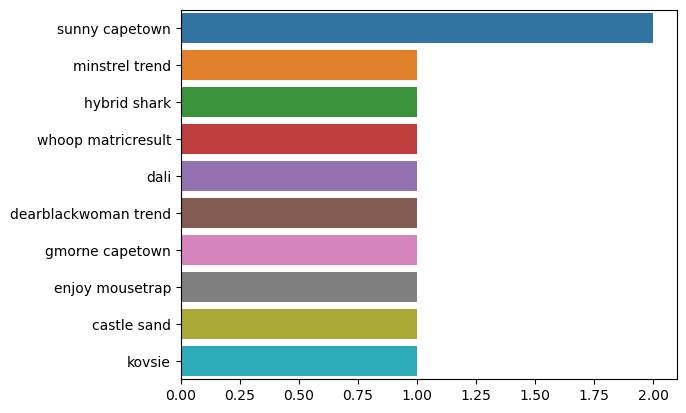

In [61]:
def ner(text,ent="PERSON"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=df1["text"].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

plt.show()

/Users/lise-mariehugo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


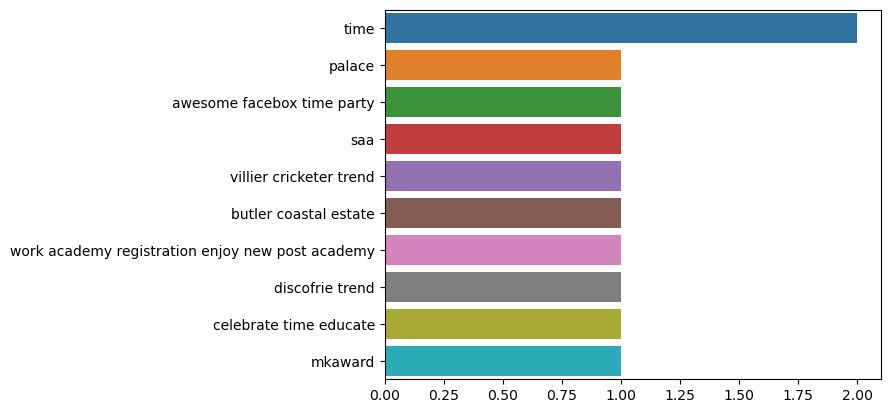

In [62]:
def ner(text,ent="ORG"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=df1["text"].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

plt.show()

In [63]:
#def pos(text):
    #pos=nltk.pos_tag(word_tokenize(text))
    #pos=list(map(list,zip(*pos)))[1]
    #return pos

#tags=df1["text"].apply(lambda x : pos(x))
#tags=[x for l in tags for x in l]
#counter=Counter(tags)

#x,y=list(map(list,zip(*counter.most_common(7))))
#sns.barplot(x=y,y=x)

#plt.show()

In [64]:
from nltk.util import ngrams

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_tri_grams=get_top_ngram(df["text"],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)



<AxesSubplot:>

In [65]:
plt.savefig('recenttrigrams.png', bbox_inches="tight", dpi=300)


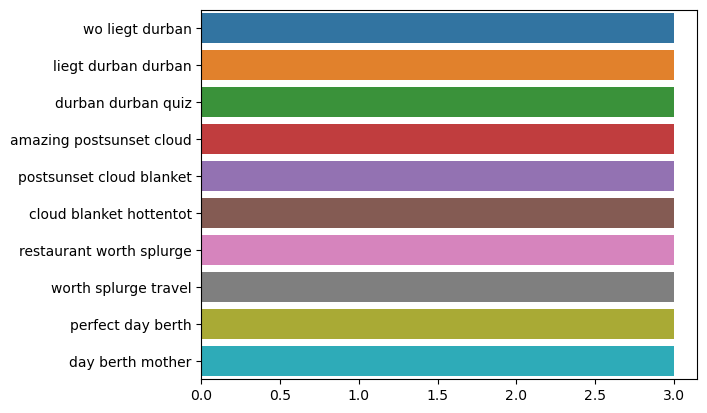

In [66]:
plt.show()

In [67]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

NameError: name 'bow_corpus' is not defined

In [ ]:
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

import pyLDAvis

In [ ]:
#LDA

def preprocess_data(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['text']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

data = df1

corpus=preprocess_data(data)


dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

In [ ]:
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
#vis

In [ ]:
#see what hashtags exist
# function to print all the hashtags in a text

type(df1["hashtag"])

In [ ]:
dim(df1['hashtag'].value_counts())

In [ ]:
df1['hashtag'].value_counts().hist()

In [ ]:
plt.show()

In [ ]:
hashtagss = df1["hashtag"].dropna()

In [ ]:
df1["hashtag"].to_excel(r'/Users/lise-mariehugo/Desktop/hashtags.xlsx')

In [ ]:
#plot stopwords

from collections import defaultdict
dic=defaultdict(int)
for word in df1['text']:
    if word in stop:
        dic[word]+=1

In [ ]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [ ]:
plt.show()

In [ ]:
print(stop)